In [108]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline 

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

1. Ethical considerations: There are many ethical considerations one must keep in mind when analyzing data. For data collection, it is important to have prior and clear consent from the participants whose data is being used, regardless of how anonymous it is. In terms of storage, it is important to discard any data that could compromise the identity of the participant. For instance, it is not a good idea to store the participant's name, as combined with their major, university and year, it could give away their identity. It is also imperative that there are robust security measures in place to guard the data. If it is stored without much security, it could be at risk of being accessed by unwanted or malicious parties. Data biases could also arise, such as only surveying students from a particular major/year/university or being more active during data collection at certain times of the day than at others. 

2. Business outcome implications: If data is not correctly collected or stored, it could create a negative impact for a business. If the data is not properly stored and gets compromised, customers lose faith in the business and could face risks due to privacy invasion. If the data collected has a lot of bias, the models being trained will be trained on that bias, and lead to misguided and biased insights. This could mean that the business could lose customers, invest in unprofitable scenarios or be unable to capitalize on important attributes. 

3. Technical implications: It is important to safeguard the data and ensure the correct security protocols are in place. This requires considerable research into existing tools and consulting with good data engineers. Depending on the tool used to collect data, bias needs to be handled. For instance, letting customers enter their own information instead of relying on the server to do so, or expecting mandatory participation to avoid skewed data. If a lot of data bias is present in the data, the trained model's results are likely to be biased as well. This would make the data scientist's or analyst's job considerable harder, as they would try to get better results from a flawed dataset. It could also become more time consuming to reduce this bias from the data. 

Data exploration

In [3]:
df = pd.read_csv("Dataset.csv")

In [73]:
df.shape

(5000, 5)

In [4]:
df.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [15]:
df.describe()

,Time
count,5000.000000
mean,12.528200
std,1.357193
min,8.000000
25%,12.000000
50%,13.000000
75%,13.000000
max,17.000000


In [18]:
year = df['Year'].values
year

array(['Year 2', 'Year 3', 'Year 3', ..., 'Year 3', 'Year 3', 'Year 2'],
      dtype=object)

In [33]:
uni = df['University']

In [20]:
major = df['Major'].values
major

array(['Physics', 'Chemistry', 'Chemistry', ..., 'Chemistry', 'Astronomy',
       'Economics'], dtype=object)

In [23]:
order = df['Order'].values

Year 3    2719
Year 2    2273
Year 1       5
Year 4       3
Name: Year, dtype: int64

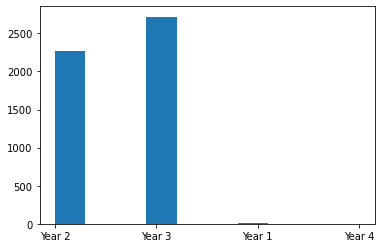

In [30]:
plt.hist(year)
df['Year'].value_counts()

Chemistry                  640
Biology                    635
Astronomy                  619
Physics                    610
Mathematics                582
Economics                  511
Business Administration    334
Political Science          309
Marketing                  239
Anthropology               146
Finance                    135
Psychology                  76
Accounting                  62
Sociology                   31
International Business      29
Music                       21
Mechanical Engineering      11
Philosophy                   4
Fine Arts                    3
Civil Engineering            3
Name: Major, dtype: int64

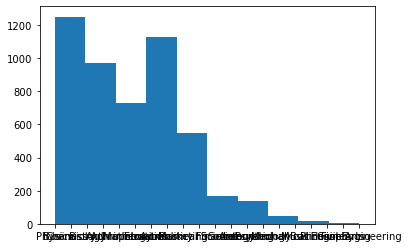

In [31]:
plt.hist(major)
df['Major'].value_counts()

For major and university as well, we have skewed data and fewer observations for certain attribute values.

Butler University                                            1614
Indiana State University                                     1309
Ball State University                                        1085
Indiana University-Purdue University Indianapolis (IUPUI)     682
University of Notre Dame                                      144
University of Evansville                                      143
Indiana University Bloomington                                 12
Valparaiso University                                           9
Purdue University                                               1
DePauw University                                               1
Name: University, dtype: int64

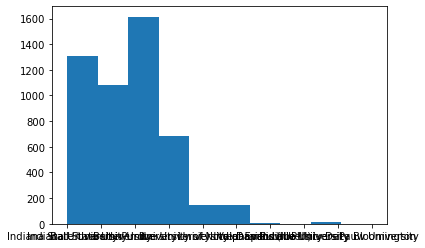

In [34]:
plt.hist(uni)
uni.value_counts()

Class balance for Order is pretty good. Each category has an almost equal number of values, so there is no bias introduced for the column. That is, our model won't do better only because it is predicting labels for the majority class. These insights can be helpful when concentrating a marketing strategy towards students from a certain major or university. 

Sugar Cream Pie                                             512
Cornbread Hush Puppies                                      510
Indiana Pork Chili                                          510
Sweet Potato Fries                                          508
Ultimate Grilled Cheese Sandwich (with bacon and tomato)    503
Indiana Buffalo Chicken Tacos (3 tacos)                     496
Indiana Corn on the Cob (brushed with garlic butter)        495
Breaded Pork Tenderloin Sandwich                            494
Fried Catfish Basket                                        490
Hoosier BBQ Pulled Pork Sandwich                            482
Name: Order, dtype: int64

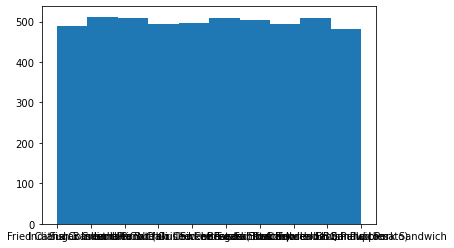

In [36]:
plt.hist(order)
df['Order'].value_counts()

In [67]:
df.groupby('University')['Major'].value_counts()

University             Major                  
Ball State University  Mathematics                206
                       Chemistry                  167
                       Biology                    143
                       Physics                    141
                       Astronomy                  135
                                                 ... 
Valparaiso University  Business Administration      1
                       Economics                    1
                       Finance                      1
                       Marketing                    1
                       Political Science            1
Name: Major, Length: 117, dtype: int64

In [58]:
uni_names = uni.unique()

In [ ]:
for uni in uni_names:
    df.groupby('University')

In [69]:
uni_names

array(['Indiana State University', 'Ball State University',
       'Butler University',
       'Indiana University-Purdue University Indianapolis (IUPUI)',
       'University of Notre Dame', 'University of Evansville',
       'Valparaiso University', 'Purdue University',
       'Indiana University Bloomington', 'DePauw University'],
      dtype=object)

(array([   8.,   40.,  247.,  857., 1314., 1316.,  883.,  282.,   49.,
           4.]),
 array([ 8. ,  8.9,  9.8, 10.7, 11.6, 12.5, 13.4, 14.3, 15.2, 16.1, 17. ]),
 <BarContainer object of 10 artists>)

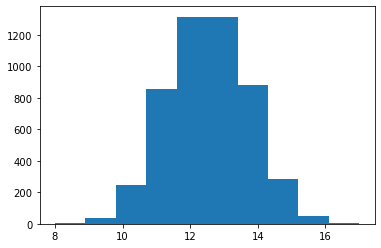

In [257]:
plt.hist(df['Time'])

For the time column, we can observe that the most number of orders are placed between 12 noon - 2pm. Lunch time seems to be the most popular time for the food truck. Discounts can be given out for breakfast and dinner time to encourage more customers.

Data cleaning: To clean and process the data, we remove null values.

In [262]:
def process_data(file_name):
    df = pd.read_csv(file_name)
    #Check NULL values
    df.isnull().sum()
    df.shape
    df.drop_duplicates().shape
    #Check NULL values
    print("Null: ", df.isnull().sum())
    newdf = df
    
    le = LabelEncoder()

    columns = ['Year', 'Major', 'University', 'Order']

    for col in columns:
    
        label = le.fit_transform(df[col])
        name = col + "Code"
        newdf[name] = label
    newdf = newdf.drop(['Year', 'Major', 'University', 'Order'], axis=1)
    return newdf

In [263]:
newdf = process_data('Dataset.csv')

Null:  Year          0
Major         0
University    0
Time          0
Order         0
dtype: int64


Observation: There are 3604 duplicate rows in the dataset, which is about 72% of the dataset. In this case, it's better to keep the duplicates instead of dropping them, as some rows may have been genuine orders from students with the same attributes, and some may have been purposely put in to give weightage to certain data rows. Removing these duplicates could introduce additional bias, so we won't do so. However, we don't want duplicate rows across the training and testing data. This skews prediction results, as a row that is present in the training data will likely be correctly predicted by the model. We will keep all the duplicates in the training data for this reason. 

Encoding categorical variables

We need to convert the categorical labels to encoded data so that it may be processed by the model. 

Model selection: GradientBooster

We will use the GradientBooster classification model, which is good for multi-class classification and is a more accurate predictor than decision trees or random forests. 

Training:

The train-test split I want to use is a 80-20 ratio. I will explore two kinds of splitting.

1)We ensure that all duplicates are in the training data. To calculate the split such that the total split remains in this ratio, we do the following: 

The goal is to keep 20% of data for training. 20% of 5000 rows = 1000 rows must be in test. The number of non duplicate rows we have is 1396. We need to perform the split on this data. 1000/1396 must go for the test. This is what we need to use for the test percentage. Out of the 1396 non duplicate rows, 72% must be in test and the rest in training. Then, the duplicate 3604 rows are added to the training set to ensure the ratio remains consistent.

2) We ignore the duplicate rows and split it in a regular manner.

Method 1

In [241]:
def split_with_duplicates(newdf, test_size):
    #extract the non duplicate rows
    nonduplicate = newdf.drop_duplicates()
    X = nonduplicate.drop('OrderCode', axis=1)
    Y = nonduplicate['OrderCode']
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
    
    #extract duplicated rows and concatenate them with the training data
    duplicates = newdf[newdf.duplicated()]
    dupX = duplicates.drop('OrderCode', axis=1)
    dupY = duplicates['OrderCode']
    trainX = pd.concat([X_train, dupX])
    trainY = pd.concat([y_train, dupY])
    
    return trainX, X_test, trainY, y_test

Method 2

In [252]:
def train_test_split_regular(newdf, test_size):
    X = newdf.drop('OrderCode', axis=1)
    Y = newdf['OrderCode']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [264]:
import pickle


In [267]:
def train_model(X_train, X_test, y_train, y_test, method):
    gradient_booster = GradientBoostingClassifier(learning_rate=0.2)
    gradient_booster.fit(X_train,y_train)
    y_pred = gradient_booster.predict(X_test)
    print(classification_report(y_test,y_pred))
    

    # save
    if method == 1:
        
        with open('model_1.pkl','wb') as f:
            pickle.dump(gradient_booster,f)
    else:
        with open('model_2.pkl','wb') as f:
            pickle.dump(gradient_booster,f)

    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot();

              precision    recall  f1-score   support

           0       0.54      0.40      0.46       133
           1       0.43      0.46      0.44       136
           2       0.43      0.37      0.40       120
           3       0.29      0.31      0.30        65
           4       0.52      0.40      0.45       124
           5       0.23      0.40      0.29        47
           6       0.32      0.47      0.38        45
           7       0.49      0.52      0.50       128
           8       0.57      0.45      0.50       153
           9       0.30      0.49      0.37        55

    accuracy                           0.43      1006
   macro avg       0.41      0.43      0.41      1006
weighted avg       0.45      0.43      0.43      1006



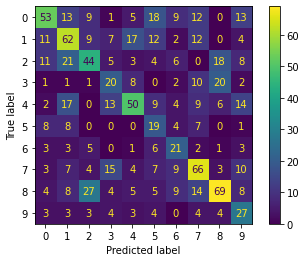

In [269]:
X_train, X_test, y_train, y_test= split_with_duplicates(newdf, 0.72)
train_model(X_train, X_test, y_train, y_test, 1)

              precision    recall  f1-score   support

           0       0.58      0.45      0.50       101
           1       0.56      0.53      0.54       114
           2       0.69      0.61      0.65       103
           3       0.73      0.67      0.70        95
           4       0.56      0.45      0.49       101
           5       0.63      0.80      0.71        91
           6       0.75      0.85      0.80       104
           7       0.53      0.67      0.59        92
           8       0.57      0.56      0.56        95
           9       0.67      0.72      0.69       104

    accuracy                           0.63      1000
   macro avg       0.63      0.63      0.62      1000
weighted avg       0.63      0.63      0.62      1000



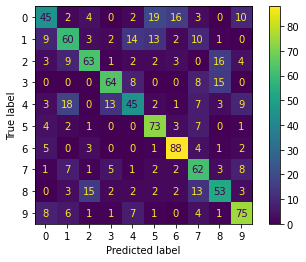

In [270]:
X_train, X_test, y_train, y_test= train_test_split_regular(newdf, 0.2)
train_model(X_train, X_test, y_train, y_test, 2)

Using a gradient boosting classifier, we see that the accuracy is much lower when we keep duplicates in the training set as opposed to when we ignore the duplicates. This is expected as we are training the model with mostly duplicates, and completely unseen data or data which isn't similar to any of the train samples is in the test set. When we ignore the duplicates and train the model, the accuracy is higher because it's likely that some of the test data is also in the train data, so the model has seen it before.

Judging by the confusion matrix, the model does a better job at predicting labels correctly in the second method.